In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### We can see there 768 instances in the dataset which is very small for ml

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

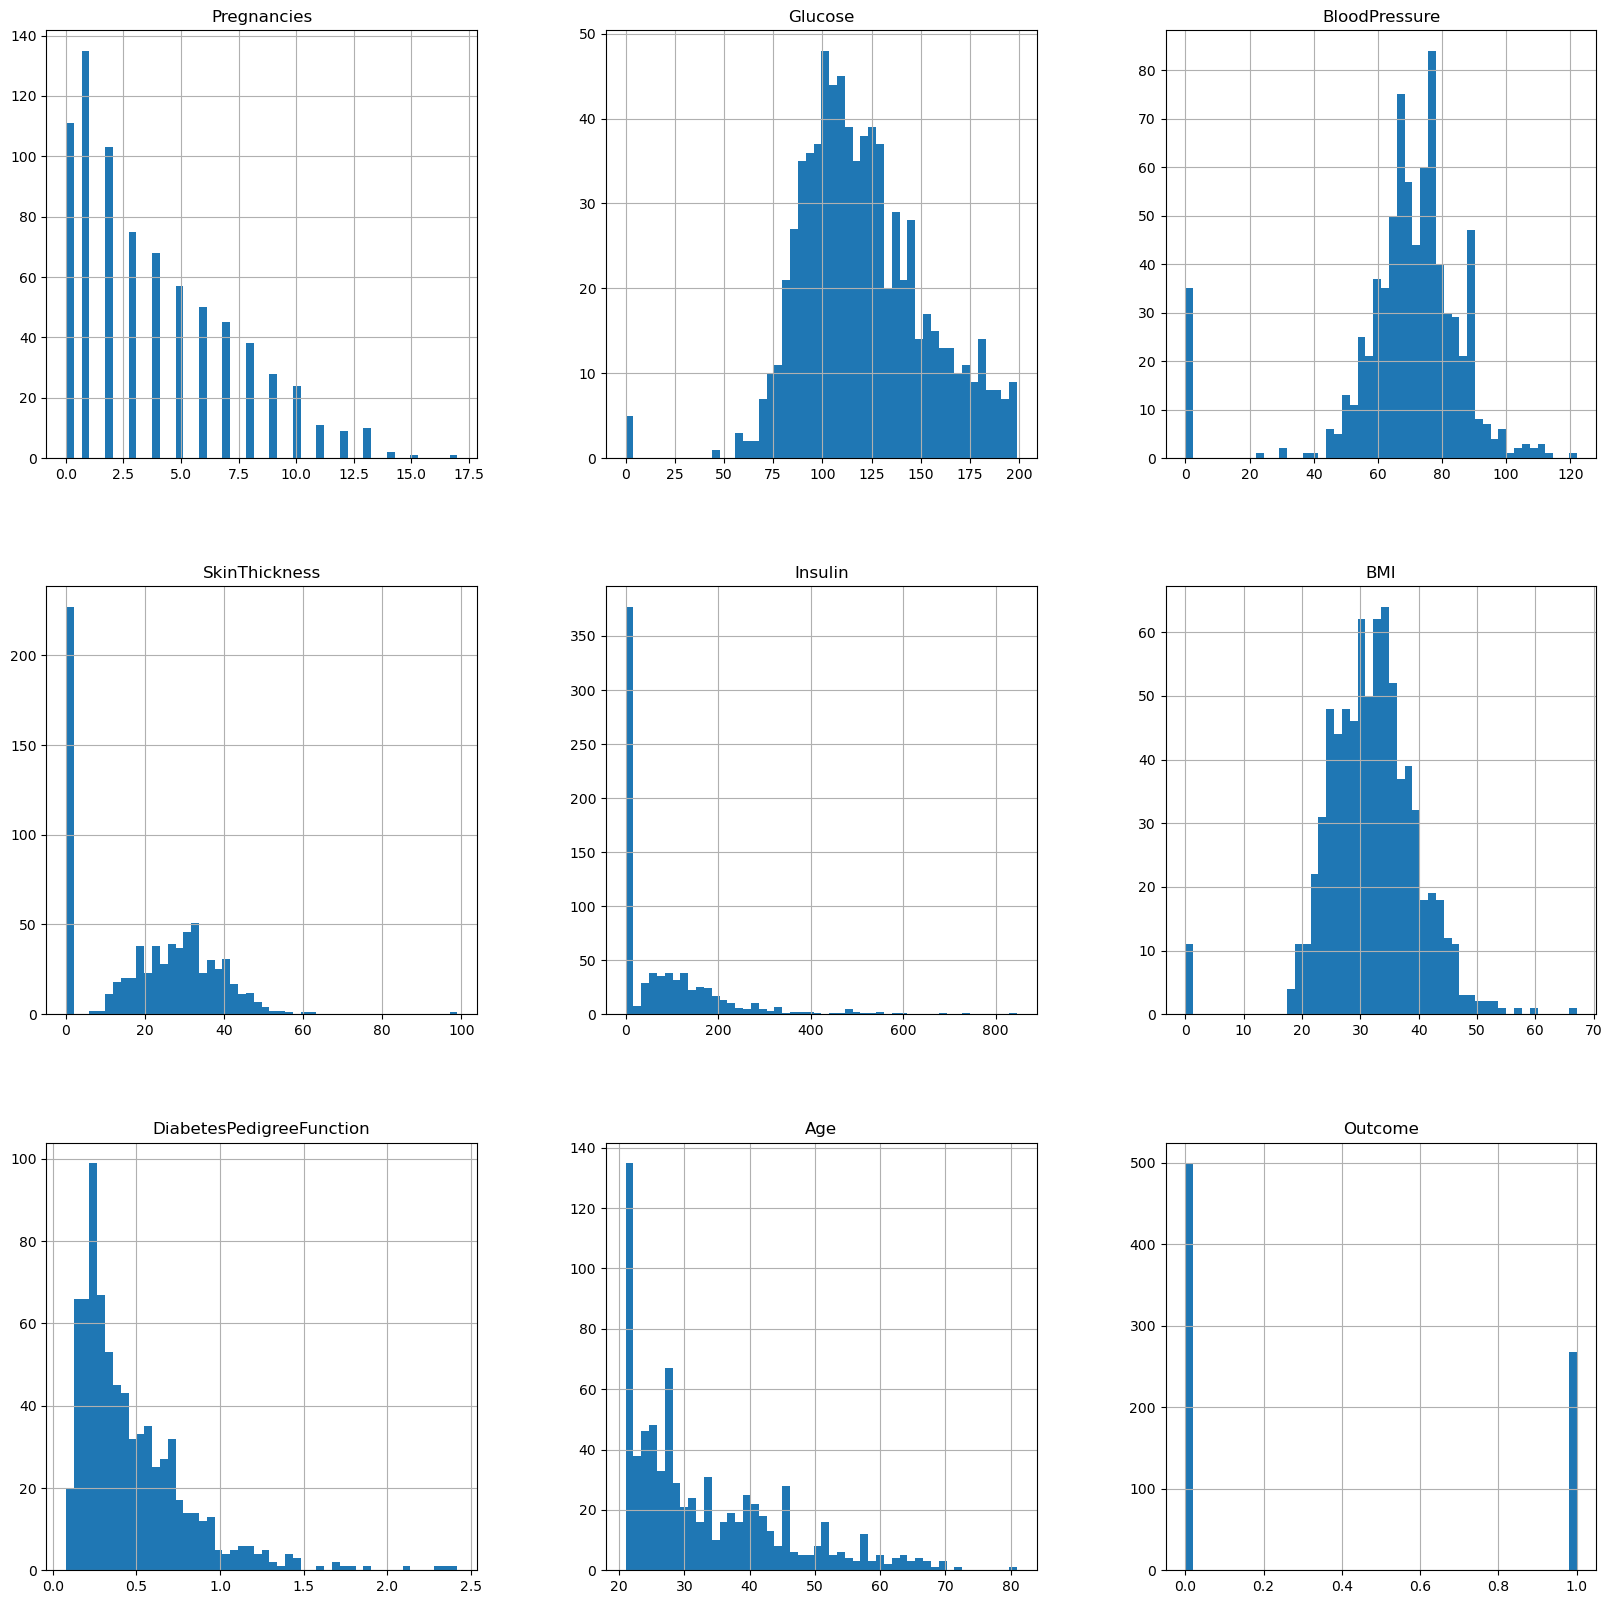

In [5]:

df.hist(bins=50,figsize=(20,20))
plt.show()

In [6]:
df.drop_duplicates(inplace=True)

## Creatin a dataset

In [7]:
from sklearn.model_selection import train_test_split
original_train_df , test_df = train_test_split(df,test_size=0.2)
train_df = original_train_df.copy()

### no major correlation between columns

## Handling missing data

In [8]:
names = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for name in names:
    train_df[name].replace(0,np.nan,inplace=True)

In [9]:
train_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2    197.0           70.0           99.0      NaN  34.7   
424            8    151.0           78.0           32.0    210.0  42.9   
256            3    111.0           56.0           39.0      NaN  30.1   
754            8    154.0           78.0           32.0      NaN  32.4   
722            1    149.0           68.0           29.0    127.0  29.3   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1  
424                     0.516   36        1  
256                     0.557   30        0  
754                     0.443   45        1  
722                     0.349   42        1

In [10]:
glucose_median = train_df["Glucose"].median()
blood_pressure_median = train_df["BloodPressure"].median()
skin_thickness_median  = train_df["SkinThickness"].median()
insulin_median = train_df["Insulin"].median()
bmi_median = train_df["BMI"].median()
age_median = train_df["Age"].median()
dpf_median = train_df["DiabetesPedigreeFunction"].median()
print(glucose_median)
print(blood_pressure_median)
print(skin_thickness_median)
print(insulin_median)
print(bmi_median)
print(age_median)
print(dpf_median)


117.0
72.0
29.0
125.0
32.349999999999994
29.0
0.37


In [11]:
train_df["Glucose"].fillna(glucose_median,inplace=True)
train_df["BloodPressure"].fillna(blood_pressure_median,inplace=True)
train_df["SkinThickness"].fillna(skin_thickness_median,inplace=True)
train_df["Insulin"].fillna(insulin_median,inplace=True)
train_df["BMI"].fillna(bmi_median,inplace=True)
train_df["Age"].fillna(age_median,inplace=True)
train_df["DiabetesPedigreeFunction"].fillna(dpf_median,inplace=True)

## Encdoing Categorical Attributes

In [12]:
temp_df = train_df.copy()
fitness_value = ["bad","moderate","good","very good"]
temp_df["fitness"] = np.random.choice(fitness_value,temp_df.shape[0])

temp_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2    197.0           70.0           99.0    125.0  34.7   
424            8    151.0           78.0           32.0    210.0  42.9   
256            3    111.0           56.0           39.0    125.0  30.1   
754            8    154.0           78.0           32.0    125.0  32.4   
722            1    149.0           68.0           29.0    127.0  29.3   

     DiabetesPedigreeFunction  Age  Outcome    fitness  
579                     0.575   62        1   moderate  
424                     0.516   36        1       good  
256                     0.557   30        0        bad  
754                     0.443   45        1       good  
722                     0.349   42        1  very good

### Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])
for id_,class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness value for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness value for first 10 entries: [2 1 0 1 3 3 1 0 1 0]


## Rescaling or Standardizing attributes

In [16]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])
temp1_df.sort_index(inplace=True)
temp1_df.head()


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2     0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.232449  0.568627      1.0  
1                  0.114298  0.196078      0.0  
2                  0.251712  0.215686      1.0  
3                  0.035531  0.000000      0.0  
4                  0.943493  0.235294      1.0

In [20]:
from sklearn.preprocessing import StandardScaler

Standard_scaler = StandardScaler()
temp2_df = train_df.copy()
temp2_df[column_names] = Standard_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.646791  0.859710      -0.022908       0.637411 -0.189357  0.152424   
1    -0.828431 -1.187021      -0.531300      -0.033701 -0.189357 -0.850357   
2     1.236880  1.996782      -0.700764      -0.033701 -0.189357 -1.323097   
3    -0.828431 -1.057070      -0.531300      -0.704814 -0.531249 -0.635476   
4    -1.123475  0.502344      -2.734332       0.637411  0.284880  1.513340   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.450538  1.482829  1.402207  
1                 -0.361955 -0.163410 -0.713162  
2                  0.583009 -0.076766  1.402207  
3                 -0.903616 -1.029852 -0.713162  
4                  5.340211  0.009878  1.402207

When to use which:
Normalization is ideal when your data does not follow a normal distribution or when you're dealing with algorithms that are distance-sensitive and sensitive to feature scale but not feature distribution (e.g., KNN, Neural Networks).

Standardization is preferred when the data follows a normal distribution, or you're working with algorithms that assume normality or rely on distances or covariance (e.g., Linear Regression, PCA, SVM).

# Feature Engineering

#### Categorcial Features

In [23]:
data = [
    {'price':85000 ,'rooms':4,'neighbourhood':'Queen Anne'},
    {'price':70000 ,'rooms':3,'neighbourhood':'Fremont'},
    {'price':65000 ,'rooms':3,'neighbourhood':'Wallingford'},
    {'price':60000 ,'rooms':2,'neighbourhood':'Fremont'}
]

In [24]:
{'Queen Anne':1,"Fremont":2,"Wallingford":3}

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

In [25]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0, 85000,     4],
       [    1,     0,     0, 70000,     3],
       [    0,     0,     1, 65000,     3],
       [    1,     0,     0, 60000,     2]])